In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from sklearn.cross_validation import KFold
import sklearn.cross_validation as cross_validation
def getX(data):
    return data.drop('area', 1)

def getY(data):
     return data['area']


In [44]:
data = pd.read_csv("forestfires.csv")
data = data.reindex(np.random.permutation(data.index))
data = pd.get_dummies(data)
one = np.ones((1, len(data)))
one = pd.DataFrame(one.T)
data = pd.concat([one, data], axis=1, join_axes=[data.index])

In [45]:
train_size = int(len(data) * 0.7)
train = data[:train_size]
test = data[train_size:]

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
cv = KFold(n = len(data), n_folds=5, shuffle=True)

In [47]:
def mserror(y, y_pred):
    return np.mean((y - y_pred)**2)

In [48]:
lg = LinearRegression(n_jobs=-1, normalize=False)
lg.fit(getX(train), getY(train))
mserror(getY(test), lg.predict(getX(test)))

749.9317057423159

In [49]:
def getYLog(data, c):
    return np.log(getY(data) + c)

In [50]:
lg = LinearRegression(n_jobs=-1, normalize=False)
lg.fit(getX(train), getYLog(train, 1))
print(mserror(getY(test), np.exp(lg.predict(getX(test)))))
print(mserror(getY(test), np.exp(lg.predict(getX(test))) - 1))

506.02913745914947
517.6720443996114


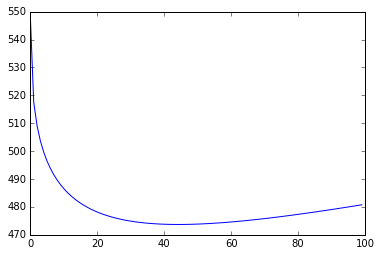

In [51]:
cs = np.arange(0.01, 100, 1)
squareErr = []
for c in cs:
    lg = LinearRegression(n_jobs=-1, normalize=False)
    lg.fit(getX(train), getYLog(train, c))
    err = mserror(getY(test), np.exp(lg.predict(getX(test))) - c)
    squareErr.append(err)
plt.plot(cs, squareErr)
b = cs[squareErr.index(min(squareErr))]

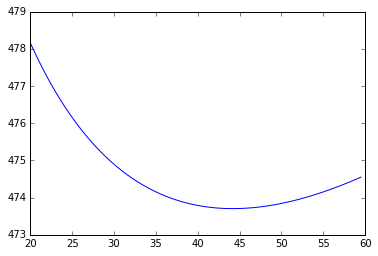

In [53]:
cs = np.arange(20, 60, 0.5)
squareErr = []
for c in cs:
    lg = LinearRegression(n_jobs=-1, normalize=False)
    lg.fit(getX(train), getYLog(train, c))
    err = mserror(getY(test), np.exp(lg.predict(getX(test))) - c)
    squareErr.append(err)
plt.plot(cs, squareErr)
b = cs[squareErr.index(min(squareErr))]

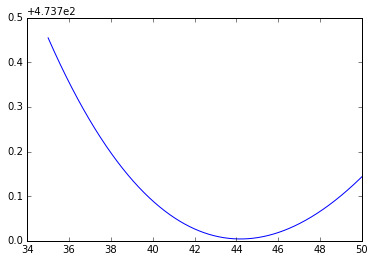

In [55]:
cs = np.arange(35, 50, 0.001)
squareErr = []
for c in cs:
    lg = LinearRegression(n_jobs=-1, normalize=False)
    lg.fit(getX(train), getYLog(train, c))
    err = mserror(getY(test), np.exp(lg.predict(getX(test))) - c)
    squareErr.append(err)
plt.plot(cs, squareErr)
b = cs[squareErr.index(min(squareErr))]

In [56]:
print(b)
lg = LinearRegression(n_jobs=-1, normalize=False)
lg.fit(getX(train), getYLog(train, b))
mserror(getY(test), np.exp(lg.predict(getX(test))) - b)

44.187


473.7041037592068

Видно, в какой точке достигается минимальное значение ошибки, теперь посмотрим зависимость от разбиения

minerr = 174.279669702
maxerr = 9.4636141089e+16


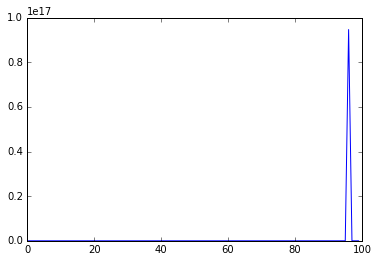

In [58]:
squareErr = []
for c in range(100):
    data = data.reindex(np.random.permutation(data.index))
    train = data[:train_size]
    test = data[train_size:]
    lg = LinearRegression(n_jobs=-1, normalize=False)
    lg.fit(getX(train), getYLog(train, b))
    err = mserror(getY(test), np.exp(lg.predict(getX(test))) - b)
    squareErr.append(err)
plt.plot(range(100), squareErr)
print("minerr = "+ str(np.min(squareErr)))
print("maxerr = "+ str(np.max(squareErr)))

Видно, что от разбиения ошибка очень сильно зависит, Штирлиц, это провал:)